In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
%matplotlib inline

In [2]:
# Select city and crs
cityname = 'rome, italy'
crs = 3035

In [3]:
# Get graph by geocoding
graph = ox.graph_from_place(cityname, network_type="walk")

# Project graph
graph = ox.projection.project_graph(graph, to_crs=crs)

In [4]:
# Simplify to get real intersections only
# (consolidate nodes within a distance from eachother)
graph_simplified = ox.simplification.consolidate_intersections(
    # Graph to simplify
    graph,
    # buffer around each node (project the graph beforehand)
    tolerance=5,
    # Get result as graph (False to get nodes only as gdf)
    rebuild_graph=True,
    # no dead ends
    dead_ends=False,
    # Reconnect (False to get intersections only)
    reconnect_edges=True
)

In [5]:
# everything to gdfs
nodes, edges = ox.graph_to_gdfs(graph)
nodes_s, edges_s = ox.graph_to_gdfs(graph_simplified)

FileNotFoundError: [Errno 2] No such file or directory: './output/graph_overview.png'

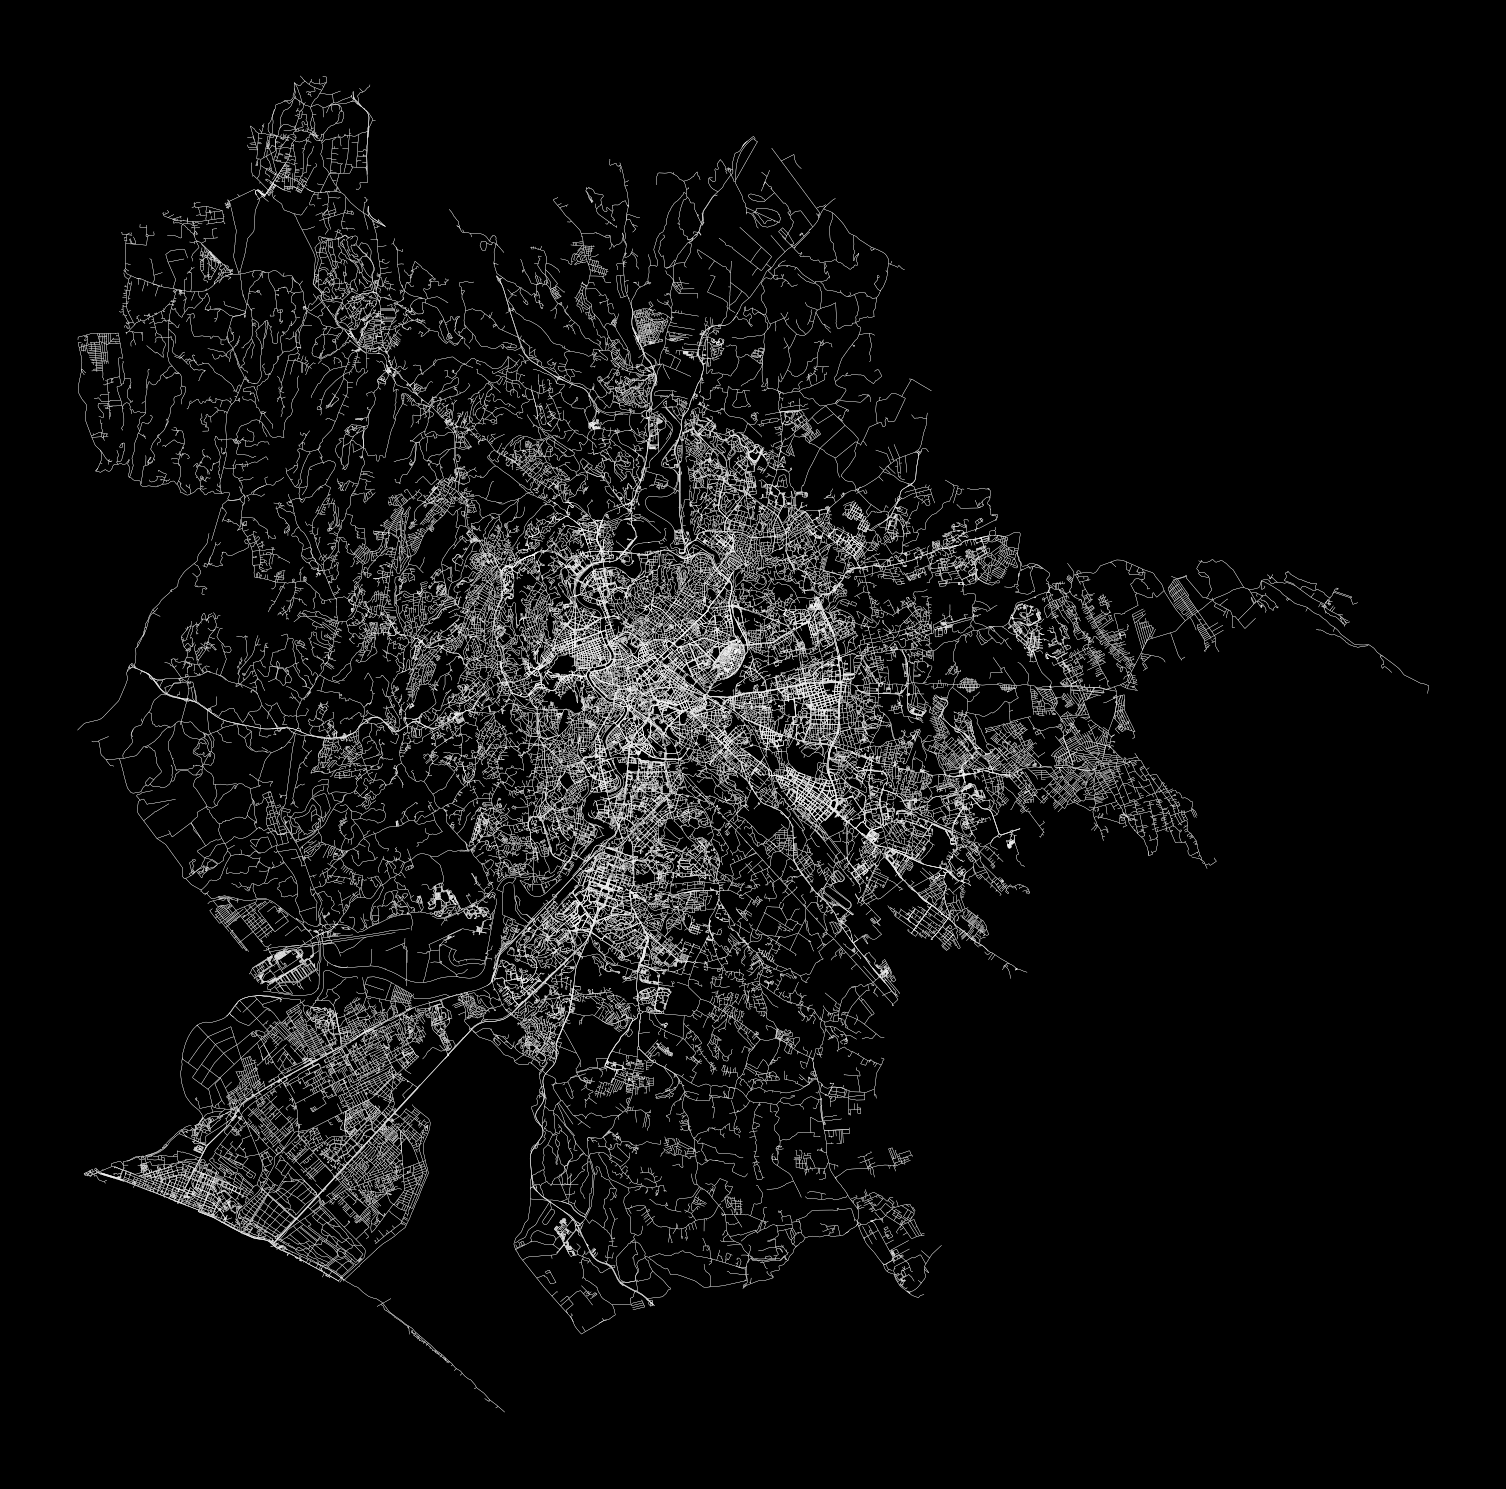

In [6]:
# Setup plot
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')

# Plot data
edges.plot(
    ax=ax,
    color='white',
    linewidth=0.2
)

# Tight layout
plt.tight_layout()

# Save
plt.savefig('./output/graph_overview.png')